# Principal Component Analysis
We have already seen how the convariance matrix $\Sigma$ allows to find the variance of a random vector __x__ in any direction __v__. Now we ask how to find the directions of maximum and minimum variance. We will use a fundamental theorem in linear algebra called the *Spectral theorem for symmetric matrices*.

## Spectral Decomposition
We know from linear algebra that a square matrix $M\in \mathbb{R}^{d\times d}$ is a linear map from $\mathbb{R}^d$ to $\mathbb{R}^d$. The eigenvectors of a linear map are the vectors which directions are not changed by the transformation, but are only scaled by a factor $\lambda$ that is the corresponding eigenvalue:
$$
Mv = \lambda v
$$
The Spectral theorem states that: If a matrix $M\in \mathbb{R}^{d\times d}$ is symmetric, then it can be written as
$$
M = 
\begin{pmatrix}u_1 & u_2 & ... & u_d\end{pmatrix}
\begin{pmatrix}
    \lambda_1 & 0 & ... & 0\\
    0 & \lambda_2 & ... & 0\\
    & & ... & \\
    0 & 0 & ... & \lambda_d\\
\end{pmatrix}
\begin{pmatrix}u_1 & u_2 & ... & u_d\end{pmatrix}^T = U\Lambda U^T
$$
where the vectors $u_i$ are d orthogonal eigenvectors with real eigenvalues.
Moreover the eigendecomposition has the following property:
$$
\begin{align}
\lambda_1 &= \quad \begin{matrix}max \\ |x| = 1\end{matrix}\quad x^TMx \\

u_1 &= \quad \begin{matrix}argmax \\ |x| = 1 \end{matrix}\quad x^TMx \\

\lambda_k &= \quad \begin{matrix}max \\ |x| = 1, x \perp  u_1, ..., u_k-1 \end{matrix}\quad x^TMx \quad \quad \text{with} \quad 2 \le k \le d-1\\

u_k &= \quad \begin{matrix}argmax \\ |x| = 1, x \perp  u_1, ..., u_k-1 \end{matrix}\quad x^TMx \quad \quad \text{with} \quad 2 \le k \le d-1\\

\lambda_d &= \quad \begin{matrix}min \\ |x| = 1, x \perp  u_1, ..., u_k-1 \end{matrix}\quad x^TMx \\

u_d &= \quad \begin{matrix}argmin \\ |x| = 1, x \perp  u_1, ..., u_k-1 \end{matrix}\quad x^TMx

\end{align}
$$

The eigendecomposition of a symmetric matrix has also a nice geometrical interpretation. In particular an orthogonal matrix $U\in \mathbb{R}^d$ (a matrix which columns are orthogonal vectors) represents a rotation in $\mathbb{R}^d$ and its transpose $U^T$ represents the inverse rotation. While a diagonal matrix $\Lambda$ represents a non-uniform scaling in the standard basis.

To make this concept clearer, let us look at a practical example.

In [1]:
import random
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# assume I have some points in R^2 arranged on a regular grid
GRID_SIZE = 10
X = np.stack([
    np.arange(0,1,1/GRID_SIZE),
    np.zeros(shape=(GRID_SIZE))],axis=-1)
for i in range(1,GRID_SIZE):
    X = np.concatenate([
        X,
        np.stack([
            np.arange(0,1,1/GRID_SIZE),
            i/GRID_SIZE * np.ones(shape=(GRID_SIZE))],axis=-1)],axis=0)
X = np.transpose(X,[1,0])
X.shape



(2, 100)

(-1.0, 1.0)

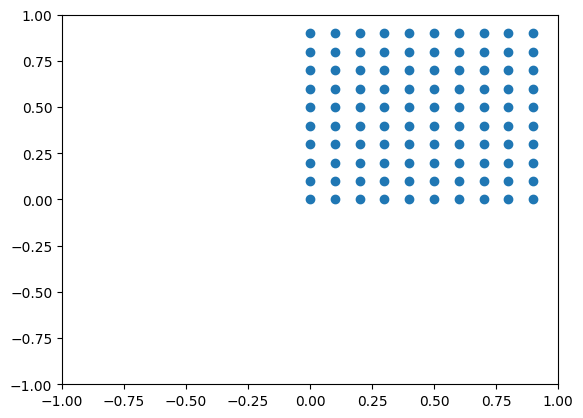

In [3]:
fig,ax = plt.subplots()
plt.scatter(X[0,:],X[1,:])
plt.xlim(-1,1)
plt.ylim(-1,1)

In [4]:
# now we take an arbitrary 2x2 symmetric matrix and apply the transformation to the points
# to make the matrix symmetrc we take a random matrix and then multiply by its transpose
M = np.random.uniform(-1,1,size=(2,2))
M = M @ np.transpose(M)

M

array([[ 0.9072681 , -0.93026711],
       [-0.93026711,  0.95401458]])

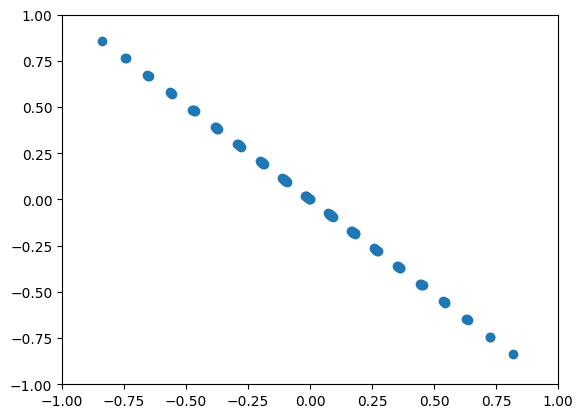

In [5]:
# now we apply the transformation to the points
X_T = M @ X

fig,ax = plt.subplots()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(X_T[0,:],X_T[1,:])
plt.show()

In [6]:
# Then we compute the eigendecomposition of the transformation M
# M = U D U^T
U,D,U_T = np.linalg.svd(M)
D = np.diag(D)
D.shape


(2, 2)

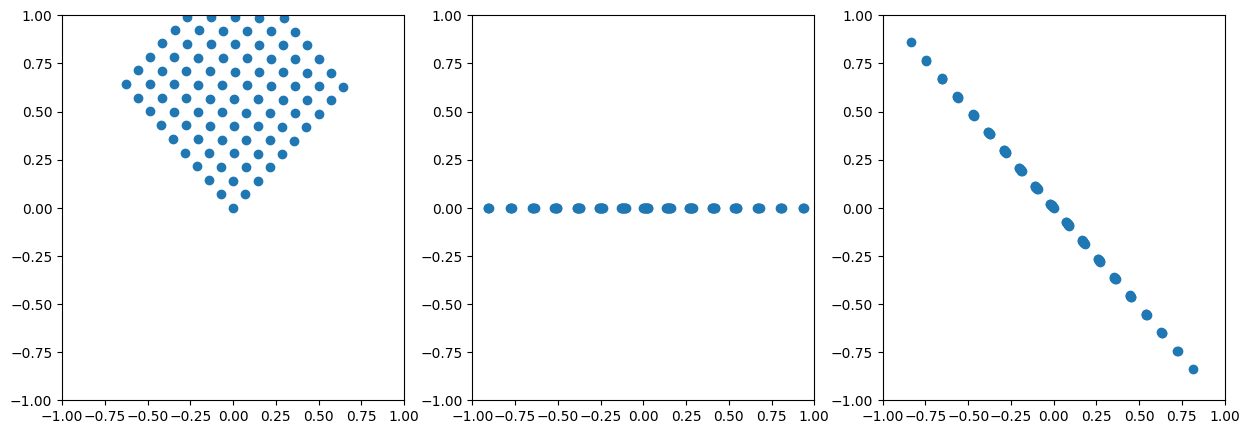

In [7]:
# Then we apply the transformations one at a time:
# the rotation U_T, then the scaling D and finally
# the second rotation U
X_R = U_T @ X
X_RS = D @ X_R
X_RSR = U @ X_RS
fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
ax[0].set_xlim(-1,1)
ax[0].set_ylim(-1,1)
ax[1].set_xlim(-1,1)
ax[1].set_ylim(-1,1)
ax[2].set_xlim(-1,1)
ax[2].set_ylim(-1,1)
ax[0].scatter(X_R[0,:],X_R[1,:])
ax[1].scatter(X_RS[0,:],X_RS[1,:])
ax[2].scatter(X_RSR[0,:],X_RSR[1,:])
plt.show()


The directions in $U$ are called principal directions, while the components obtained projecting a vector __x__ onto the principal directions are called principal components of __x__:
$$
\mathbf{pc(x)} = 
\begin{pmatrix}
\mathbf{u_1}^T\mathbf{x} \\
\mathbf{u_2}^T\mathbf{X} \\
... \\
\mathbf{u_d}^T\mathbf{x}
\end{pmatrix}
$$

## Principal Directions of a Covariance Matrix
First we show that a covariance matrix is symmetric by construction. In particular a matrix M is symmetric if it is equal to its transpose $M = M^T$, or equivalently if $M_{ij} = M_{ji}$. In a covariance matrix $\Sigma$, we have that:
$$
\Sigma_{ij} = Cov(x_i,x_j) = E[(x_i-E[x_i])(x_j-E[x_j])] = Cov(x_j,x_i) = \Sigma_{ji}
$$
Hence $\Sigma$ is symmetric and it admits an eigendecomposition of the form described in the previous section.
So, in order to understand the variance of a random vector x in different directions, we just need to compute the eigendecomposition of its covariance matrix. The principal direction $\mathbf{u_1}$ will be the direction with maximum variance, with variance $\lambda_1$, $\mathbf{u_2}$ will be the direction with maximum variance orthogonal to $\mathbf{u_1}$, with variance $\lambda_2$. In general $\mathbf{u_k}$ will be the direction with maximum variance such that $\mathbf{u_k}$ is the orthogonal complement to the space spanned by the vectors $\{ \mathbf{u_1}, ..., \mathbf{u_{k-1}} \}$ (i.e. $\mathbf{u_k}$ is orthogonal to each vector in the set) and its variance is $\lambda_k$.

The principal components of a random vector __x__ are given by the projections of the vector __x__ onto the eigenvectors $\mathbf{u_i}$: 
$$
\mathbf{pc} = 
\begin{pmatrix}
\mathbf{u_1}^T\mathbf{x} \\
\mathbf{u_2}^T\mathbf{X} \\
... \\
\mathbf{u_d}^T\mathbf{x}
\end{pmatrix}
$$
We can show easily that the principal components are uncorrelated (have no linear correlation):
$$
\begin{align}
Cov(pc_i, pc_j) &= E[(u_i^T x-E[u_i^T x])(u_j^T x-E[u_j^T x])] \\
&= E[u_i^T(x-E[x])u_j^T(x-E[x])] \\
&= E[u_i^T(x-E[x])(u_j^T(x-E[x]))^T] \\
&= E[u_i^T(x-E[x])(x-E[x])^T u_j] \\
&= u_i^T E[(x-E[x])(x-E[x])^T]u_j \\
&= u_i^T \Sigma u_j \\
&= u_i^T \lambda_j u_j \\
&= \lambda_j u_i^T u_j \\
&= 0
\end{align}
$$

To compute the principal components of a dataset we can use the following algorithm:

- Arrange the dataset into a matrix $X \in R^{d \times n}$ where d is the dimension of the data and n is the size of the dataset (subtract mean $\mu$ to each sample such that the distribution has 0 mean).
$$
X = 
\begin{pmatrix}
| & | & ... & | \\
x_1-\mu & x_2-\mu & ... & x_n-\mu \\
| & | & ... & | \\
\end{pmatrix}
$$
- Compute the sample covariance matrix (covariance matrix estimated from the samples in the dataset):
$$
\begin{align}
\Sigma &= \frac{1}{n}
\begin{pmatrix}
\sum_{i=1}^n (x_i[0]-\mu[0])(x_i[0]-\mu[0]) & ... & \sum_{i=1}^n (x_i[0]-\mu[0])(x_i[d]-\mu[d]) \\
... & ... & ... \\
\sum_{i=1}^n (x_i[d]-\mu[d])(x_i[0]-\mu[0]) & ... & \sum_{i=1}^n (x_i[d]-\mu[d])(x_i[d]-\mu[d])
\end{pmatrix} \\
&= \frac{1}{n}
\begin{pmatrix}
| & & | \\
x_1-\mu & ... & x_n-\mu\\
| & & | \\
\end{pmatrix}
\begin{pmatrix}
\_\_\_ & x_1 - \mu & \_\_\_ \\
&...&\\
\_\_\_ & x_n - \mu & \_\_\_ \\
\end{pmatrix}\\

&= \frac{1}{n}X X^T
\end{align}
$$
- Compute the eigendecomposition of $\Sigma$ to find the principal directions:
$$
\Sigma = U\Lambda U^T
$$
- Compute the principal components for each data sample:
$$
pc(X) = U^T X = 
\begin{pmatrix}
|&...&|\\
pc(x_1)&...&pc(x_n)\\
|&...&|\\
\end{pmatrix}
$$

As a final consideration the covariance matrix can be interpreted geometrically as the transformation (linear map) that aligns the axis with the directions that do not have linear correlation and scales them by the variance of the random vector in each of those directions.

## Example
In this example we will visualize the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) using only the first 2 and 3 Principal Components. The MNIST dataset contains 28x28 grayscale images with hand written digits.

In [8]:
# read the dataset from file
with open("../datasets/MNIST/mnist_test.csv","r") as f:
    lines = f.readlines()
lines = lines[1:]

images = []
labels = []
for l in lines:
    l = l.split(",")
    labels.append(int(l[0]))
    img = np.asarray(l[1:],dtype=np.float32)
    images.append(img)

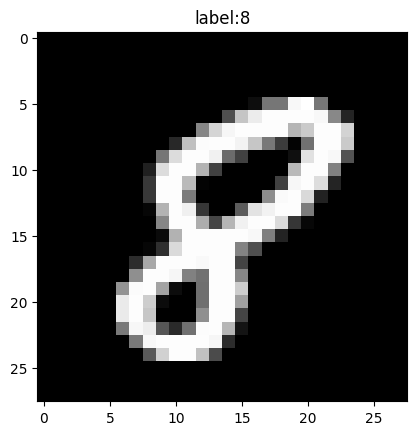

In [9]:
# show a random sample with its label. Run 
# multiple times this cell to see different
# samples
i = random.randint(0,len(images)-1)
img = np.reshape(images[i],(28,28,1))
fig,ax = plt.subplots()
ax.imshow(img,cmap="gray")
ax.set_title(f"label:{labels[i]}")
plt.show()

Now we will implement the algorithm described above to compute the principal components of every sample in the dataset.

In [10]:
# create the data matrix X by stacking
# all the images. Remember that X is a dxn matrix, where d is 
# dimension of the data and n is the size of the 
# dataset
X = np.stack(images,axis=1)
X.shape

(784, 10000)

In [11]:
# normalize pixel values between [0,1]
X = X/255.
# compute the mean vector
mu = np.mean(X,axis=1,keepdims=True)
mu.shape

(784, 1)

In [12]:
# subtract the mean vector
X = X - mu

In [13]:
# compute the covariance matrix
n = X.shape[1]
cov = 1/n *  X @ np.transpose(X)
cov.shape

(784, 784)

In [14]:
# compute the eigendecomposition
U,S,U_t = np.linalg.svd(cov)
S = np.diag(S)

In [15]:
# compute the principal components
pc = np.transpose(U) @ X
pc.shape

(784, 10000)

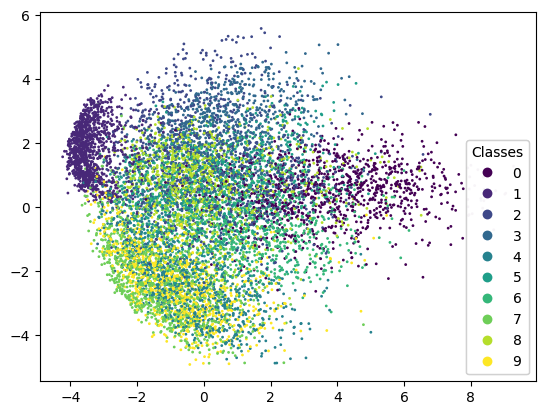

In [16]:
# now we consider only the first 2 principal components
# and plot the data, the color of each sample represents
# its label, according to the legend that you see in the image
fig,ax = plt.subplots()
scatter = ax.scatter(pc[0,:],pc[1,:],c=labels,s=1.)
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend)
plt.show()

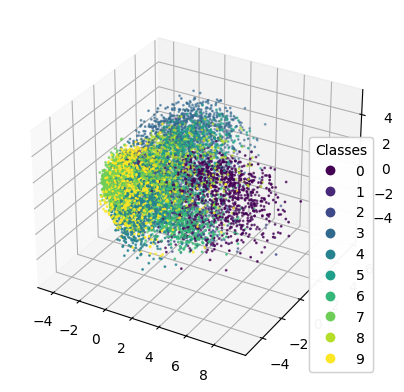

In [17]:
# now we consider only the first 2 principal components
# and plot the data, the color of each sample represents
# its label, according to the legend that you see in the image
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(pc[0,:],pc[1,:],pc[2,:],c=labels,s=1.)
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend)
plt.show()

In [18]:
# now lets see the variance ini the principal directions
print(np.diag(S))

[5.31001425e+00 3.98712897e+00 3.24515510e+00 2.86744404e+00
 2.65892696e+00 2.24412870e+00 1.75001884e+00 1.55917573e+00
 1.44268203e+00 1.20390499e+00 1.12772810e+00 1.10727847e+00
 9.12106931e-01 8.90893400e-01 8.32929254e-01 7.89849997e-01
 6.88351810e-01 6.75647676e-01 6.23671949e-01 6.06856287e-01
 5.63578844e-01 5.42845547e-01 5.17762125e-01 4.76621062e-01
 4.69414234e-01 4.36829090e-01 4.22650248e-01 4.04731899e-01
 3.79193395e-01 3.63202602e-01 3.43061358e-01 3.31442535e-01
 3.11954945e-01 3.07449430e-01 2.87884265e-01 2.86255211e-01
 2.68068790e-01 2.54263967e-01 2.43189692e-01 2.38621876e-01
 2.30961114e-01 2.24268913e-01 2.18244195e-01 2.05913171e-01
 1.99893773e-01 1.95781991e-01 1.89346954e-01 1.75311565e-01
 1.72716126e-01 1.64802998e-01 1.60696268e-01 1.57402441e-01
 1.52460068e-01 1.47288948e-01 1.44286901e-01 1.38972387e-01
 1.34743318e-01 1.33713499e-01 1.29241884e-01 1.27599657e-01
 1.23856857e-01 1.23315431e-01 1.17889099e-01 1.13903984e-01
 1.10358976e-01 1.069271

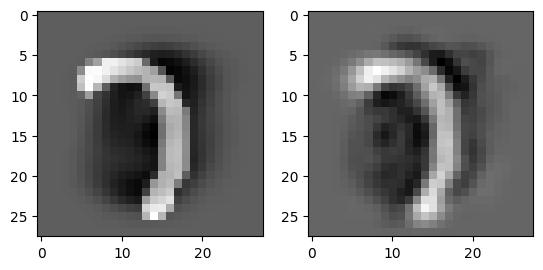

In [19]:
# now we plot some random samples using only the first N_COMP principal components,
# the other components are set to zero
N_COMP = 64

# take a random sample from the data matrix X
i = random.randint(0,X.shape[1])
x = X[:,i,None]
# compute the principal components: the projection
# of the vector x onto the principal directions. This 
# transformation is a rotation that transforms aligns the
# axis with the principal directions
pc_x = U_t @ x
# replace the last principal components with 
# zeros
pc_x[N_COMP:] = np.zeros_like(pc_x[N_COMP:])
# undo the transformation: rotate back the space
# to align the axis with the standard basis
x_r = U @ pc_x
fig,ax = plt.subplots(1,2)
ax[0].imshow(np.reshape(x,(28,28,1)),cmap="gray")
ax[1].imshow(np.reshape(x_r,(28,28,1)),cmap="gray")
plt.show()